# 2day

In [85]:
%cd /home/alpaco/mys/oshLecture/sub_class

/home/alpaco/mys/oshLecture/sub_class


## 데이터 불러오고 확인

In [86]:
import pandas as pd

df = pd.read_csv("./data/train.csv")
display(df.head())
display(df.info())

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
0,1_20220601 00,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28
1,1_20220601 01,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36
2,1_20220601 02,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88
3,1_20220601 03,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76
4,1_20220601 04,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204000 entries, 0 to 203999
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   num_date_time  204000 non-null  object 
 1   건물번호           204000 non-null  int64  
 2   일시             204000 non-null  object 
 3   기온(C)          204000 non-null  float64
 4   강수량(mm)        43931 non-null   float64
 5   풍속(m/s)        203981 non-null  float64
 6   습도(%)          203991 non-null  float64
 7   일조(hr)         128818 non-null  float64
 8   일사(MJ/m2)      116087 non-null  float64
 9   전력소비량(kWh)     204000 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 15.6+ MB


None

In [87]:
df.isnull().sum() #정량적

num_date_time         0
건물번호                  0
일시                    0
기온(C)                 0
강수량(mm)          160069
풍속(m/s)              19
습도(%)                 9
일조(hr)            75182
일사(MJ/m2)         87913
전력소비량(kWh)            0
dtype: int64

In [88]:
df.columns

Index(['num_date_time', '건물번호', '일시', '기온(C)', '강수량(mm)', '풍속(m/s)', '습도(%)',
       '일조(hr)', '일사(MJ/m2)', '전력소비량(kWh)'],
      dtype='object')

In [89]:
data = df[['건물번호', '기온(C)', '풍속(m/s)', '습도(%)', '전력소비량(kWh)']]
display(data.corr())
display(data.isnull().sum())

,건물번호,기온(C),풍속(m/s),습도(%),전력소비량(kWh)
건물번호,1.000000,-0.004505,0.021483,0.022985,-0.180474
기온(C),-0.004505,1.000000,0.220203,-0.389854,0.171190
풍속(m/s),0.021483,0.220203,1.000000,-0.219095,0.109954
습도(%),0.022985,-0.389854,-0.219095,1.000000,-0.129546
전력소비량(kWh),-0.180474,0.171190,0.109954,-0.129546,1.000000


건물번호           0
기온(C)          0
풍속(m/s)       19
습도(%)          9
전력소비량(kWh)     0
dtype: int64

## 데이터 결측치 처리

In [90]:
data.fillna(data.mean(), inplace=True)
display(data.isnull().sum())

/tmp/ipykernel_76379/1157975695.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna(data.mean(), inplace=True)


건물번호          0
기온(C)         0
풍속(m/s)       0
습도(%)         0
전력소비량(kWh)    0
dtype: int64

## X, y 정의

In [91]:
X = data[['건물번호', '기온(C)', '풍속(m/s)', '습도(%)']]
y = data['전력소비량(kWh)']

display(X)
display(y)

,건물번호,기온(C),풍속(m/s),습도(%)
0,1,18.6,0.9,42.0
1,1,18.0,1.1,45.0
2,1,17.7,1.5,45.0
3,1,16.7,1.4,48.0
4,1,18.4,2.8,43.0
...,...,...,...,...
203995,100,23.1,0.9,86.0
203996,100,22.4,1.3,86.0
203997,100,21.3,1.0,92.0
203998,100,21.0,0.3,94.0


0         1085.28
1         1047.36
2          974.88
3          953.76
4          986.40
           ...   
203995     881.04
203996     798.96
203997     825.12
203998     640.08
203999     540.24
Name: 전력소비량(kWh), Length: 204000, dtype: float64

## 데이터셋 분리

In [92]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

## 스케일링

In [93]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_scailed = scaler.fit_transform(X_train)
X_valid_scailed = scaler.transform(X_valid)
print(X_train_scailed)

[[ 0.5         0.76595745  0.5        -0.22727273]
 [-0.8         0.38297872 -0.375       0.22727273]
 [-0.48       -0.31914894  0.6875      0.18181818]
 ...
 [-0.66       -0.12765957  0.375       0.72727273]
 [ 0.18       -0.06382979 -0.1875      0.18181818]
 [-0.36       -0.34042553  0.875       0.27272727]]


## 모델학습 및 옵튜나

In [94]:
# !pip install optuna

In [95]:
import optuna
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [96]:
def objective(trial):
    param = {
        'max_depth' : trial.suggest_int('max_depth', 1, 10),
        'min_samples_leaf' : trial.suggest_int('min_samples_leaf', 1, 10)
    }
    
    # 학습 모델 생성
    model = DecisionTreeRegressor(**param)
    model.fit(X_train_scailed, y_train) # 학습 진행
    
    pred = model.predict(X_valid_scailed)
    # 모델 성능 확인
    score = mean_squared_error(pred, y_valid)
    
    return score**(1/2)

In [97]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials = 100)
study.best_params

[I 2024-07-01 14:09:02,430] A new study created in memory with name: no-name-ea128732-5824-403a-b35c-d792f02386dd
[I 2024-07-01 14:09:02,633] Trial 0 finished with value: 951.6064362935994 and parameters: {'max_depth': 7, 'min_samples_leaf': 4}. Best is trial 0 with value: 951.6064362935994.
[I 2024-07-01 14:09:02,827] Trial 1 finished with value: 951.6064362935994 and parameters: {'max_depth': 7, 'min_samples_leaf': 4}. Best is trial 0 with value: 951.6064362935994.
[I 2024-07-01 14:09:02,926] Trial 2 finished with value: 1875.4905226044632 and parameters: {'max_depth': 3, 'min_samples_leaf': 3}. Best is trial 0 with value: 951.6064362935994.
[I 2024-07-01 14:09:03,197] Trial 3 finished with value: 828.4932180836945 and parameters: {'max_depth': 10, 'min_samples_leaf': 10}. Best is trial 3 with value: 828.4932180836945.
[I 2024-07-01 14:09:03,386] Trial 4 finished with value: 951.6064362935994 and parameters: {'max_depth': 7, 'min_samples_leaf': 3}. Best is trial 3 with value: 828.493

{'max_depth': 10, 'min_samples_leaf': 8}

## 베스트 파라미터로 재학습

In [98]:
model = DecisionTreeRegressor(**study.best_params)
model.fit(X_train_scailed, y_train)
y_pred = model.predict(X_valid_scailed)

In [99]:
# 의사결정에 기여를 많이한 정도
pd.DataFrame({'feature':X.columns , 'importance':model.feature_importances_})

,feature,importance
0,건물번호,0.947920
1,기온(C),0.041376
2,풍속(m/s),0.006304
3,습도(%),0.004399


# 2day 실습

와인 퀄리티 예측해보기

In [100]:
%cd /home/alpaco/mys/oshLecture/sub_class

/home/alpaco/mys/oshLecture/sub_class


In [101]:
import pandas as pd

data = pd.read_csv('./data/wine.csv')
display(data)
display(data.info())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


None

<Axes: >

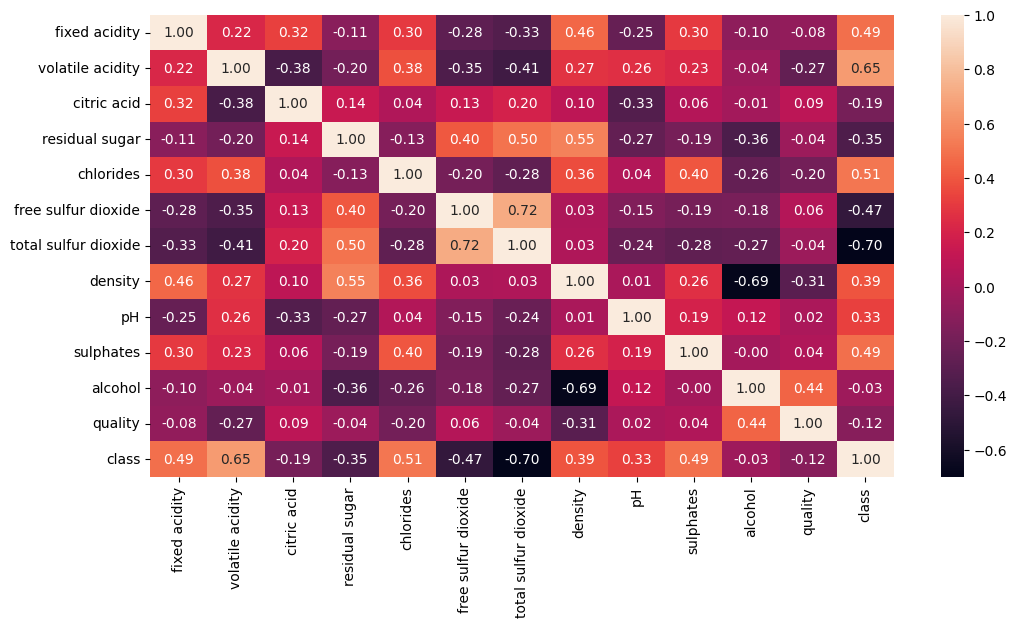

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.heatmap(data=data.corr(), annot=True, fmt='.2f')

In [103]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'class'],
      dtype='object')

In [104]:
X = data[['volatile acidity','chlorides','density','pH', 'sulphates', 'alcohol']]
y = data['quality']

display(X)
display(y)

,volatile acidity,chlorides,density,pH,sulphates,alcohol
0,0.70,0.076,0.99780,3.51,0.56,9.4
1,0.88,0.098,0.99680,3.20,0.68,9.8
2,0.76,0.092,0.99700,3.26,0.65,9.8
3,0.28,0.075,0.99800,3.16,0.58,9.8
4,0.70,0.076,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...
6492,0.21,0.039,0.99114,3.27,0.50,11.2
6493,0.32,0.047,0.99490,3.15,0.46,9.6
6494,0.24,0.041,0.99254,2.99,0.46,9.4
6495,0.29,0.022,0.98869,3.34,0.38,12.8


0       5
1       5
2       5
3       6
4       5
       ..
6492    6
6493    5
6494    6
6495    7
6496    6
Name: quality, Length: 6497, dtype: int64

In [105]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)


In [106]:
from sklearn.preprocessing import RobustScaler

rbst = RobustScaler()
X_train_scailed = rbst.fit_transform(X_train)
X_valid_scailed = rbst.transform(X_valid)
display(X_train_scailed)
display(X_valid_scailed)

array([[-0.70588235, -0.25925926, -1.15283843, -1.42857143,  0.41176471,
         0.94444444],
       [-0.64705882, -0.2962963 ,  0.41266376,  0.33333333,  1.29411765,
         0.        ],
       [ 0.        , -0.66666667, -1.08078603,  0.19047619, -0.47058824,
         1.11111111],
       ...,
       [-0.52941176, -0.33333333,  0.01528384, -0.47619048, -0.35294118,
         0.11111111],
       [ 0.35294118, -0.2962963 , -0.28165939, -0.28571429, -0.94117647,
         0.88888889],
       [-0.82352941, -0.44444444, -0.0720524 , -0.85714286, -0.94117647,
         0.11111111]])

array([[ 1.17647059,  2.07407407,  1.29039301, -0.23809524,  2.94117647,
         0.66666667],
       [ 0.47058824,  1.51851852,  0.27074236,  0.38095238,  0.47058824,
         0.44444444],
       [ 1.52941176,  1.        ,  0.54803493,  0.19047619,  0.35294118,
        -0.61111111],
       ...,
       [-0.29411765, -0.48148148, -0.22489083, -0.52380952,  0.41176471,
         1.44444444],
       [-0.58823529,  0.22222222,  0.81004367, -0.33333333, -0.05882353,
        -0.66666667],
       [ 0.52941176, -0.33333333, -0.93668122, -0.14285714, -1.05882353,
         1.44444444]])

In [107]:
import optuna
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [108]:
def objective(trial):
    param = {
        'max_depth' : trial.suggest_int('max_depth', 1, 20),
        'min_samples_leaf' : trial.suggest_int('min_samples_leaf', 1, 20)
    }
    
    # 학습 모델 생성
    model = DecisionTreeRegressor(**param)
    model.fit(X_train_scailed, y_train) # 학습 진행
    
    pred = model.predict(X_valid_scailed)
    # 모델 성능 확인
    score = mean_squared_error(pred, y_valid)
    
    return score**(1/2)

In [110]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials = 100)
study.best_params

[I 2024-07-01 14:09:44,438] A new study created in memory with name: no-name-dc3f592a-4268-4968-b47f-699e221c6b22
[I 2024-07-01 14:09:44,447] Trial 0 finished with value: 0.773001867673111 and parameters: {'max_depth': 2, 'min_samples_leaf': 18}. Best is trial 0 with value: 0.773001867673111.
[I 2024-07-01 14:09:44,465] Trial 1 finished with value: 0.7534422499505385 and parameters: {'max_depth': 10, 'min_samples_leaf': 8}. Best is trial 1 with value: 0.7534422499505385.
[I 2024-07-01 14:09:44,485] Trial 2 finished with value: 0.7696874975151968 and parameters: {'max_depth': 20, 'min_samples_leaf': 9}. Best is trial 1 with value: 0.7534422499505385.
[I 2024-07-01 14:09:44,503] Trial 3 finished with value: 0.7639183333642954 and parameters: {'max_depth': 12, 'min_samples_leaf': 10}. Best is trial 1 with value: 0.7534422499505385.
[I 2024-07-01 14:09:44,519] Trial 4 finished with value: 0.7446349907741832 and parameters: {'max_depth': 17, 'min_samples_leaf': 18}. Best is trial 4 with val

{'max_depth': 8, 'min_samples_leaf': 20}

In [111]:
model = DecisionTreeRegressor(**study.best_params)
model.fit(X_train_scailed, y_train)
y_pred = model.predict(X_valid_scailed)

In [112]:
# 의사결정에 기여를 많이한 정도
pd.DataFrame({'feature':X.columns , 'importance':model.feature_importances_})


,feature,importance
0,volatile acidity,0.220042
1,chlorides,0.062012
2,density,0.058850
3,pH,0.048356
4,sulphates,0.073914
5,alcohol,0.536826


# 2day 숙제

와인 클래스 분류

In [28]:
%cd /home/alpaco/mys/oshLecture/sub_class

/home/alpaco/mys/oshLecture/sub_class


In [29]:
import pandas as pd

wine_data = pd.read_csv('./data/wine.csv')
display(wine_data.head())
display(wine_data.info())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


None

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,-0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,0.512678
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,-0.471644
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.487218


<Axes: >

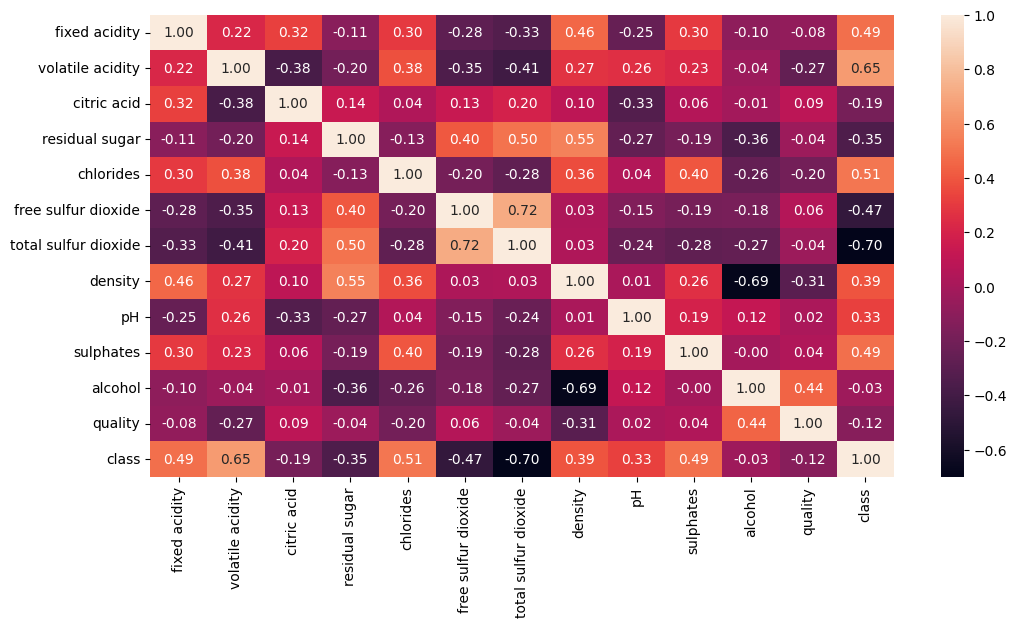

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

display(wine_data.corr())
plt.figure(figsize=(12,6))
sns.heatmap(data=wine_data.corr(), annot=True, fmt='.2f')

In [31]:
display(wine_data.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'class'],
      dtype='object')

In [32]:
X = wine_data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates']]
y = wine_data['class']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [34]:
from sklearn.preprocessing import RobustScaler

rbst = RobustScaler()
X_train_scailed = rbst.fit_transform(X_train)
X_valid_scailed = rbst.transform(X_valid)
display(X_train_scailed)
display(X_valid_scailed)

array([[-0.07692308, -0.29411765, -0.57142857, ..., -0.52928416,
        -0.47619048,  2.05882353],
       [-0.76923077, -0.70588235,  1.28571429, ..., -0.62906725,
         0.04761905, -0.47058824],
       [ 2.69230769, -0.29411765,  0.78571429, ...,  0.5856833 ,
         0.04761905,  3.23529412],
       ...,
       [ 0.30769231, -0.41176471, -0.28571429, ..., -0.4143167 ,
         0.42857143, -0.35294118],
       [-0.23076923,  0.76470588,  1.07142857, ...,  0.77657267,
         0.14285714,  0.        ],
       [ 0.23076923,  0.23529412,  0.64285714, ..., -0.62906725,
        -0.80952381, -1.17647059]])

array([[-0.84615385,  0.05882353, -0.07142857, ..., -1.29718004,
         1.        , -0.52941176],
       [-1.07692308, -0.58823529,  0.        , ..., -1.14099783,
         1.23809524, -0.58823529],
       [-0.38461538, -0.35294118,  0.35714286, ...,  0.94143167,
         0.28571429, -0.52941176],
       ...,
       [ 0.76923077, -0.23529412,  0.85714286, ..., -0.06507592,
         0.85714286,  0.58823529],
       [-1.23076923,  0.73529412, -0.85714286, ..., -0.48806941,
         1.61904762, -0.52941176],
       [ 0.15384615, -0.29411765,  0.64285714, ...,  1.10629067,
         0.66666667, -0.47058824]])

In [35]:
import optuna
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [36]:
def objective(trial):
    param = {
        'max_depth' : trial.suggest_int('max_depth', 1, 20),
        'min_samples_leaf' : trial.suggest_int('min_samples_leaf', 1, 20)
    }
    
    # 학습 모델 생성
    model = DecisionTreeRegressor(**param)
    # 학습 진행
    model.fit(X_train_scailed, y_train) 
    # 예측
    y_pred = model.predict(X_valid_scailed)
    # 모델 성능 확인
    score = mean_squared_error(y_pred, y_valid)
    
    return score**(1/2)

In [37]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials = 100)
study.best_params #베스트 파라미터 확인

[I 2024-07-01 18:39:32,958] A new study created in memory with name: no-name-0e5084dd-175b-4a1d-b490-1f8f7fb560fb
[I 2024-07-01 18:39:32,985] Trial 0 finished with value: 0.1192155646187516 and parameters: {'max_depth': 11, 'min_samples_leaf': 11}. Best is trial 0 with value: 0.1192155646187516.
[I 2024-07-01 18:39:33,011] Trial 1 finished with value: 0.13680503291951168 and parameters: {'max_depth': 20, 'min_samples_leaf': 17}. Best is trial 0 with value: 0.1192155646187516.
[I 2024-07-01 18:39:33,021] Trial 2 finished with value: 0.15029554198348688 and parameters: {'max_depth': 3, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.1192155646187516.
[I 2024-07-01 18:39:33,046] Trial 3 finished with value: 0.0840032104845724 and parameters: {'max_depth': 11, 'min_samples_leaf': 1}. Best is trial 3 with value: 0.0840032104845724.
[I 2024-07-01 18:39:33,055] Trial 4 finished with value: 0.15029554198348688 and parameters: {'max_depth': 3, 'min_samples_leaf': 11}. Best is trial 3 wit

{'max_depth': 11, 'min_samples_leaf': 1}

In [42]:
model = DecisionTreeRegressor(**study.best_params)
model.fit(X_train_scailed, y_train)
y_pred = model.predict(X_valid_scailed)
score = mean_squared_error(y_pred, y_valid)
score**(1/2)

np.float64(0.08846338305166802)

In [39]:
# 의사결정에 기여를 많이한 정도
pd.DataFrame({'feature':X.columns , 'importance':model.feature_importances_})

,feature,importance
0,fixed acidity,0.023998
1,volatile acidity,0.013368
2,citric acid,0.000235
3,residual sugar,0.006542
4,chlorides,0.647202
5,free sulfur dioxide,0.000892
6,total sulfur dioxide,0.245584
7,density,0.028049
8,pH,0.005735
9,sulphates,0.028396


In [48]:
#결과 보기
import pandas as pd

# y_pred와 y_valid 값을 DataFrame으로 만들기
results = pd.DataFrame({'y_pred': y_pred, 'y_valid': y_valid})
results

,y_pred,y_valid
4270,0.000319,0
5384,0.014286,0
4301,0.000319,0
6259,0.000319,0
3340,0.000319,0
...,...,...
2611,0.000319,0
2107,0.014286,0
1135,1.000000,1
2541,0.014286,0


In [50]:
# y_pred와 y_valid 값을 enumerate()로 인덱스와 함께 출력하기
for i, (pred, valid) in enumerate(zip(y_pred, y_valid)):
    print(f"Index: {i}, y_pred: {pred}, y_valid: {valid}")


Index: 0, y_pred: 0.00031857279388340236, y_valid: 0
Index: 1, y_pred: 0.014285714285714285, y_valid: 0
Index: 2, y_pred: 0.00031857279388340236, y_valid: 0
Index: 3, y_pred: 0.00031857279388340236, y_valid: 0
Index: 4, y_pred: 0.00031857279388340236, y_valid: 0
Index: 5, y_pred: 1.0, y_valid: 1
Index: 6, y_pred: 0.00031857279388340236, y_valid: 0
Index: 7, y_pred: 0.00031857279388340236, y_valid: 0
Index: 8, y_pred: 1.0, y_valid: 1
Index: 9, y_pred: 0.00031857279388340236, y_valid: 0
Index: 10, y_pred: 1.0, y_valid: 1
Index: 11, y_pred: 0.00031857279388340236, y_valid: 0
Index: 12, y_pred: 0.014285714285714285, y_valid: 0
Index: 13, y_pred: 1.0, y_valid: 1
Index: 14, y_pred: 0.014285714285714285, y_valid: 0
Index: 15, y_pred: 0.0, y_valid: 0
Index: 16, y_pred: 1.0, y_valid: 1
Index: 17, y_pred: 0.00031857279388340236, y_valid: 0
Index: 18, y_pred: 0.00031857279388340236, y_valid: 0
Index: 19, y_pred: 0.00031857279388340236, y_valid: 0
Index: 20, y_pred: 1.0, y_valid: 1
Index: 21, y_pr

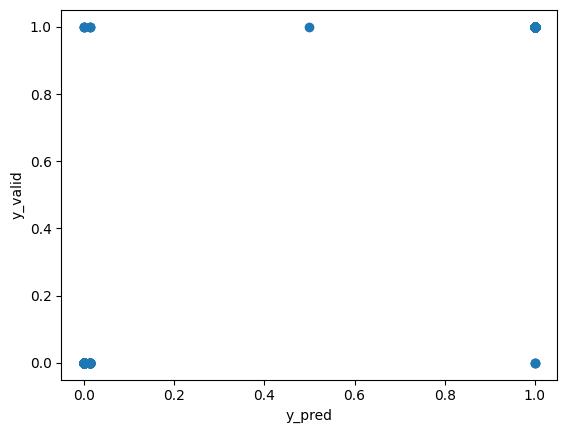

In [51]:
import matplotlib.pyplot as plt

# y_pred와 y_valid 값을 산점도로 표현하기
plt.scatter(y_pred, y_valid)
plt.xlabel('y_pred')
plt.ylabel('y_valid')
plt.show()

#